### Official Tutorial on CLIMADA TP Reconstrcution

## Part 1: Load and Display IBTrACS data.

* Before starting, we need to download the data in NetCDF format and store in ./climada/data.
* To read IBTrACS data, apply from_ibtracs_netcdf() in the climada.hazard pacakge.
    * The parameters of from_ibtracs_netcdf() are: 
        * from_ibtracs_netcdf(
        * provider= (str or list of str, optional) [eg. 'usa', 'tokyo', 'newdelhi', 'reunion', 'bom', 'nadi', 'wellington', 'cma', 'hko', 'ds824', 'td9636', 'td9635', 'neumann', 'mlc', 'official', 'official_3h'...] [Default: None], 
        * rescale_windspeeds= (bool, optional) [Default: True], 
        * storm_id= (str or list of str, optional) [Default: None], 
        * year_range= (tuple (min_year, max_year), optional) [Default: None], 
        * basin= (str, optional) [Default: None], 
        * genesis_basin= (str, optional) [eg.  ‘NA’ (North Atlantic), ‘SA’ (South Atlantic), ‘EP’ (Eastern North Pacific, which includes the Central Pacific region), ‘WP’ (Western North Pacific), ‘SP’ (South Pacific), ‘SI’ (South Indian), ‘NI’ (North Indian)...] [Default: None], 
        * interpolate_missing= (bool, optional) [Default: True], 
        * estimate_missing= (bool, optional) [Default: False], 
        * correct_pres= (bool, optional) [Default: False], 
        * discard_single_points= (bool, optional) [Default: False], 
        * additional_variables= (list of str, optional) [Default: None], 
        * file_name='IBTrACS.ALL.v04r00.nc')


2023-12-04 16:13:28,440 - climada.hazard.tc_tracks - WARNING - 19 storm events are discarded because no valid wind/pressure values have been found: 1993178N14265, 1993221N12216, 1993223N07185, 1993246N16129, 1993263N11168, ...
Number of tracks: 33


Text(0.5, 1.0, 'SIDR and ROANU')

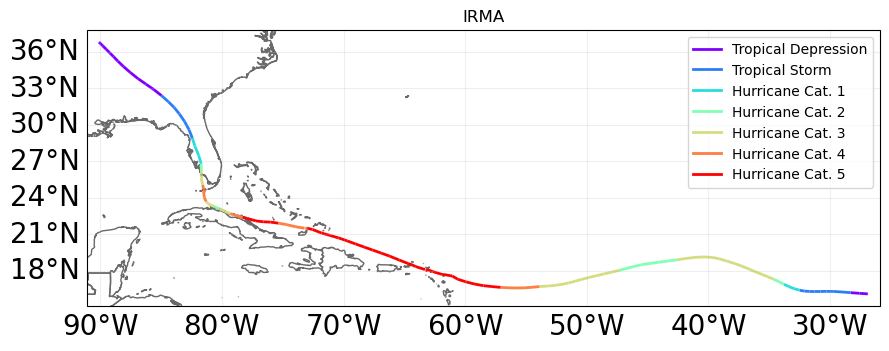

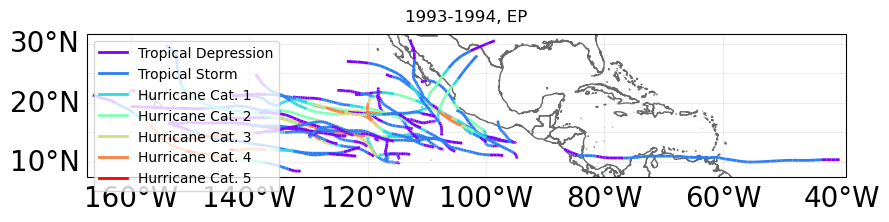

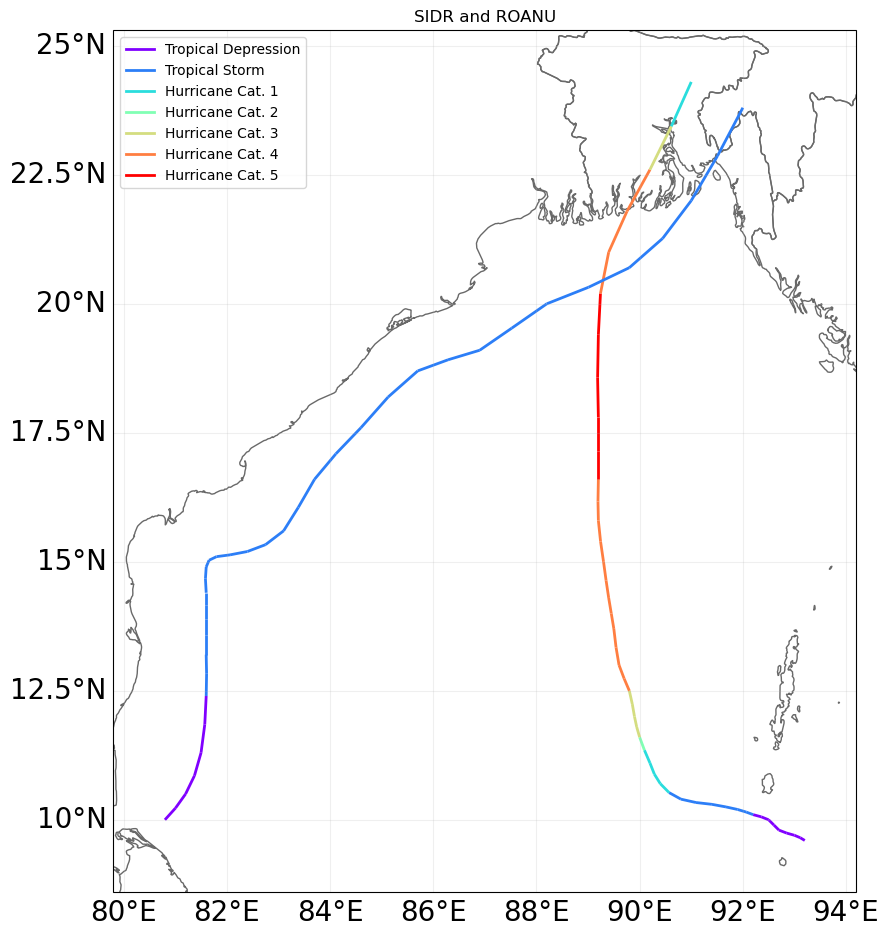

In [34]:
from climada.hazard import TCTracks

# Select a specified TC.
tr_irma = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id='2017242N16333')
ax = tr_irma.plot();
ax.set_title('IRMA')

# Select TC from 1993 to 1994 in basin EP.
sel_ibtracs = TCTracks.from_ibtracs_netcdf(provider='usa', year_range=(1993, 1994), basin='EP', correct_pres=False)
print('Number of tracks:', sel_ibtracs.size)
ax = sel_ibtracs.plot()
ax.get_legend()._loc = 2 # Adjust legend location.
ax.set_title('1993-1994, EP')

# Merge TCs.
track1 = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id='2007314N10093')
track2 = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id='2016138N10081')
track1.append(track2.data) # Put both tracks together.
ax = track1.plot()
ax.get_legend()._loc = 2
ax.set_title('SIDR and ROANU')

<GeoAxes: >

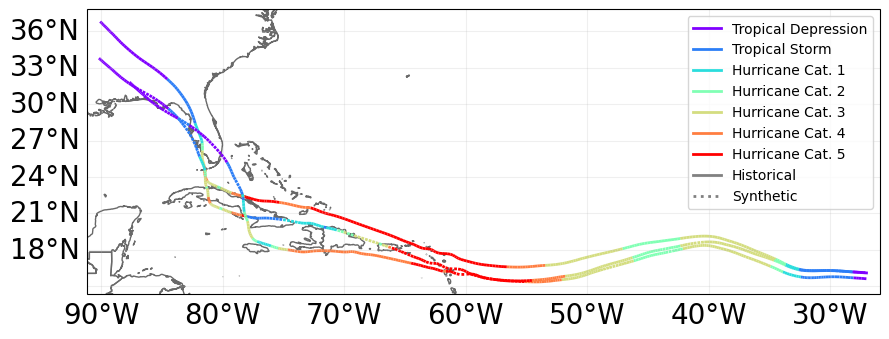

In [2]:
tr_irma.equal_timestep()
tr_irma.calc_perturbed_trajectories(nb_synth_tracks=5)
tr_irma.plot()

## Part 2: TropCyclon() Class

<GeoAxes: title={'center': 'Event ID 1: 2017242N16333'}>

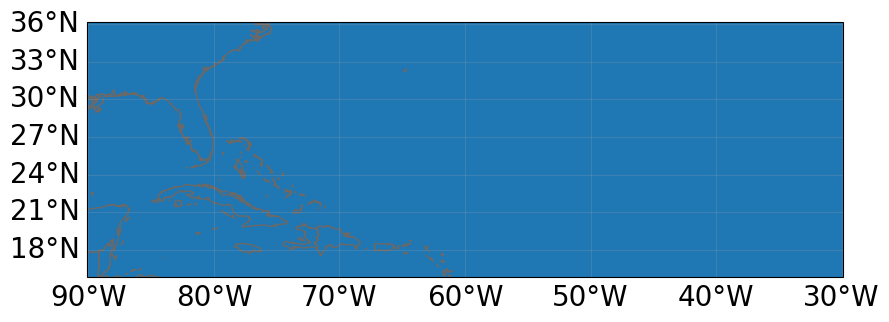

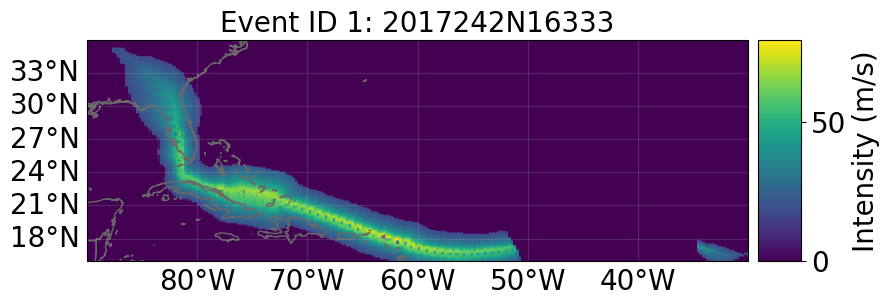

In [36]:
from climada.hazard import Centroids, TropCyclone

# Construct centroids.
min_lat, max_lat, min_lon, max_lon = 16, 36, -90, -30
cent = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res = 0.12)
cent.check()
cent.plot()

# Construct tropical cyclones
tc_irma = TropCyclone.from_tracks(tr_irma, centroids = cent)
tc_irma.check()
tc_irma.plot_intensity('2017242N16333')


In [42]:
tc_irma.write_raster('C:/Users/wwwla/Desktop/output.tif')

## Part 3: Damage Calculation with User Defined Points

<GeoAxes: >

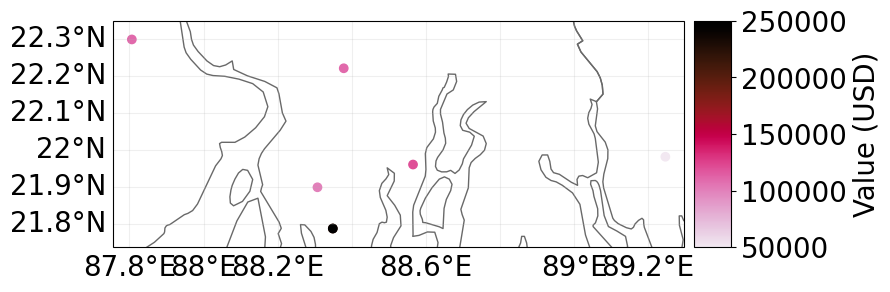

In [12]:
import numpy as np
from climada.entity import Exposures, ImpactFuncSet, ImpfTropCyclone
from climada.hazard import Centroids, TCTracks, TropCyclone
from climada.engine import ImpactCalc

# Set Exposures in points
exp_pnt = Exposures(crs='epsg:4326') #set coordinate system
exp_pnt.gdf['latitude'] = np.array([21.899326, 21.960728, 22.220574, 22.298390, 21.787977, 21.787977, 21.981732])
exp_pnt.gdf['longitude'] = np.array([88.307422, 88.565362, 88.378337, 87.806356, 88.348835, 88.348835, 89.246521])
exp_pnt.gdf['value'] = np.array([1.0e5, 1.2e5, 1.1e5, 1.1e5, 2.0e5, 2.5e5, 0.5e5])
exp_pnt.check()
exp_pnt.plot_scatter(buffer=0.05)

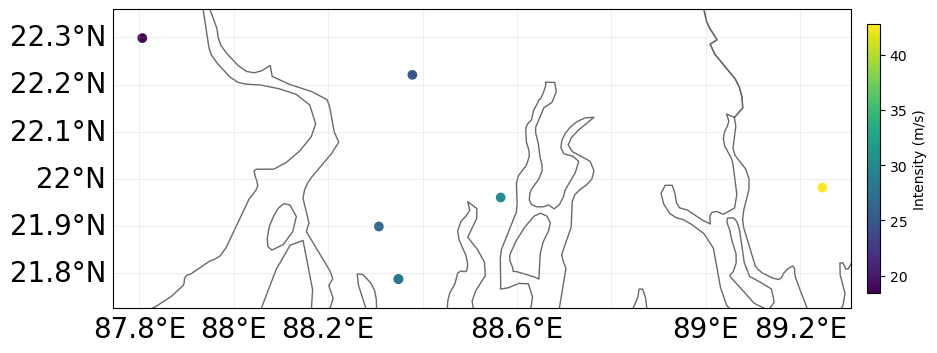

In [13]:
# Set Hazard in Exposures points
# set centroids from exposures coordinates
centr_pnt = Centroids.from_lat_lon(exp_pnt.gdf.latitude.values, exp_pnt.gdf.longitude.values, exp_pnt.crs)
# compute Hazard in that centroids
tr_pnt = TCTracks.from_ibtracs_netcdf(storm_id='2007314N10093')
tc_pnt = TropCyclone.from_tracks(tr_pnt, centroids=centr_pnt)
tc_pnt.check()
ax_pnt = tc_pnt.centroids.plot(c=np.array(tc_pnt.intensity[0,:].todense()).squeeze())# plot intensity per point
ax_pnt.get_figure().colorbar(ax_pnt.collections[0], fraction=0.0175, pad=0.02).set_label('Intensity (m/s)') # add colorbar

2023-12-04 16:03:55,240 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-12-04 16:03:55,269 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-12-04 16:03:55,308 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-12-04 16:03:55,359 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-12-04 16:03:55,387 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-12-04 16:03:55,403 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2023-12-04 16:03:55,420 - climada.entity.exposures.litpop.gpw_populati

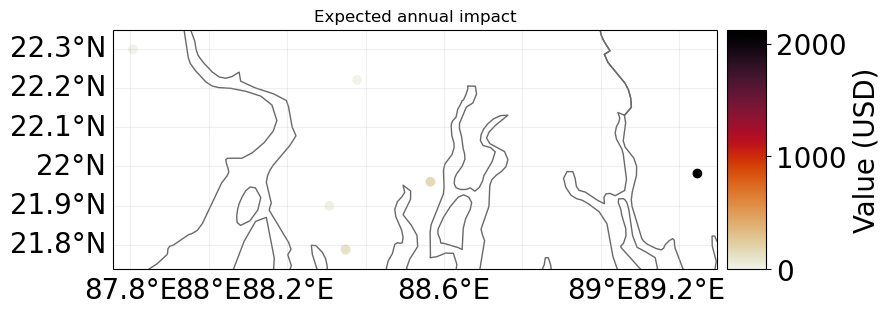

In [31]:
from climada.entity import LitPop

# Set impact function
impf_tc = ImpfTropCyclone.from_emanuel_usa()
impf_pnt = ImpactFuncSet([impf_tc])
impf_pnt.check()

impf_set = ImpactFuncSet([impf_tc])

exp_lp = LitPop.from_countries(countries=['CUB'], res_arcsec=300, fin_mode='income_group')
exp_lp.check()

# Get the hazard type and hazard id
[haz_type] = impf_set.get_hazard_types()
[haz_id] = impf_set.get_ids()[haz_type]
# Exposures: rename column and assign id
exp_lp.gdf.rename(columns={"impf_": "impf_" + haz_type}, inplace=True)
exp_lp.gdf['impf_' + haz_type] = haz_id
exp_lp.gdf.head()
# Compute Impact
imp_pnt = ImpactCalc(exp_pnt, impf_pnt, tc_pnt).impact()
# nearest neighbor of exposures to centroids gives identity
print('Nearest neighbor hazard.centroids indexes for each exposure:', exp_pnt.gdf.centr_TC.values)
imp_pnt.plot_scatter_eai_exposure(ignore_zero=False, buffer=0.05);

In [41]:
tc_test = TropCyclone.from_tracks(tr_pnt, centroids=centr_pnt, store_windfields=True)

import scipy.sparse
import numpy as np
import pandas as pd

dense_matrices = []
for sparse_matrix in tc_test.windfields:
    dense_matrices.append(sparse_matrix.toarray())

df = pd.DataFrame(dense_matrices)
df.to_csv('C:/Users/wwwla/Desktop/windfields_export.csv', index=False)

ValueError: Must pass 2-d input. shape=(1, 35, 14)

## Part 4: Read and write ImpactFuncSet into Excel sheets

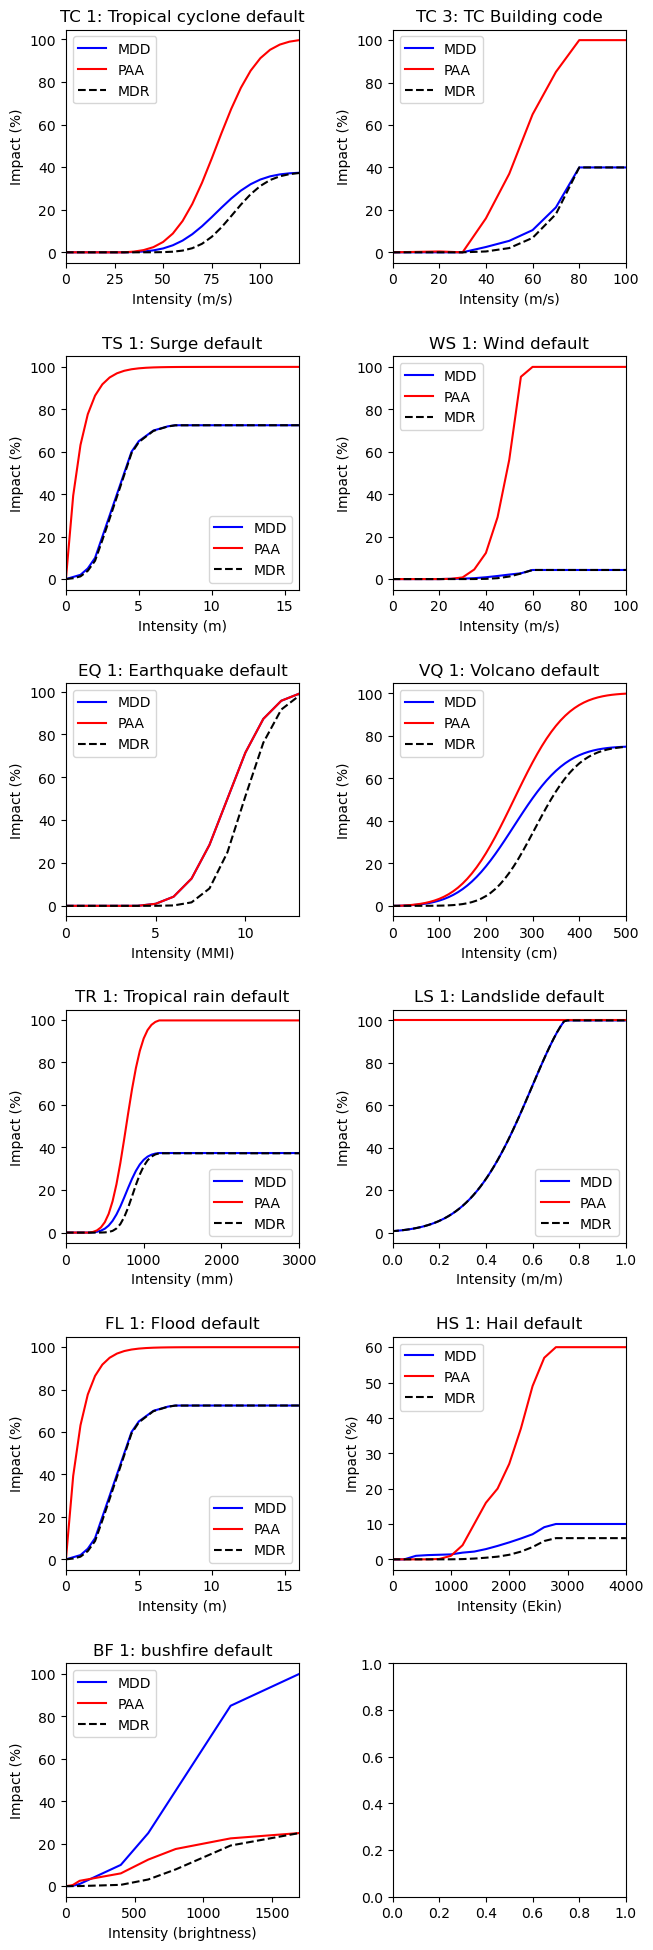

In [28]:
from climada.entity import ImpactFuncSet
from climada.util import ENT_TEMPLATE_XLS
import matplotlib.pyplot as plt

# provide absolute path of the input excel file
file_name = ENT_TEMPLATE_XLS
# fill ImpactFuncSet from Excel file
imp_set_xlsx = ImpactFuncSet.from_excel(file_name)

# plot all the impact functions from the ImpactFuncSet
imp_set_xlsx.plot()
# adjust the plots
plt.subplots_adjust(right=1., top=4., hspace=0.4, wspace=0.4)

In [30]:
# write imp_set_xlsx into an excel file
imp_set_xlsx.write_excel('C:/Users/wwwla/Desktop/tutorial_impf_set.xlsx')